# a48 TSP PROBLEM SOLVE FOR 2-OPT ALGORITHM

In [124]:
import numpy as np
import time
# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.

In [126]:
with open('att48_array.txt', 'r') as myfile:
    data=myfile.read().replace('\n', '')
data = eval(data)
data = np.array(data)
data

array([[2233,   10],
       [5530, 1424],
       [ 401,  841],
       [3082, 1644],
       [7608, 4458],
       [7573, 3716],
       [7265, 1268],
       [6898, 1885],
       [1112, 2049],
       [5468, 2606],
       [5989, 2873],
       [4706, 2674],
       [4612, 2035],
       [6347, 2683],
       [6107,  669],
       [7611, 5184],
       [7462, 3590],
       [7732, 4723],
       [5900, 3561],
       [4483, 3369],
       [6101, 1110],
       [5199, 2182],
       [1633, 2809],
       [4307, 2322],
       [ 675, 1006],
       [7555, 4819],
       [7541, 3981],
       [3177,  756],
       [7352, 4506],
       [7545, 2801],
       [3245, 3305],
       [6426, 3173],
       [4608, 1198],
       [  23, 2216],
       [7248, 3779],
       [7762, 4595],
       [7392, 2244],
       [3484, 2829],
       [6271, 2135],
       [4985,  140],
       [1916, 1569],
       [7280, 4899],
       [7509, 3239],
       [  10, 2676],
       [6807, 2993],
       [5185, 3258],
       [3023, 1942]])

In [127]:
start_time = time.time()
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(data,0.001)
end_time = time.time()
duration = end_time - start_time
print("Execution time of code is : ",duration)

Execution time of code is :  1.615081787109375


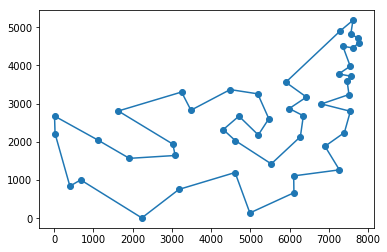

Route: [ 0 24  2 33 43  8 40  3 46 22 30 37 19 45  9 21 11 23 12  1 38 13 10 31 18
 41 15 25 17 35  4 28 26 34  5 16 42 44 29 36  7  6 20 14 39 32 27]

Distance: 35955.042778


In [128]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data[route[i]] for i in range(len(route))]),np.array([data[0]])))
# Plot the cities.
plt.scatter(data[:,0],data[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data)))

# a280 TSP PROBLEM SOLVE FOR 2-OPT ALGORITHM

In [130]:
with open('a280_array.txt', 'r') as myfile:
    data_2=myfile.read().replace('\n', '')
data_2 = eval(data_2)
data_2 = np.array(data_2)
data_2

array([[288, 129],
       [270, 133],
       [256, 141],
       [256, 157],
       [246, 157],
       [236, 169],
       [228, 169],
       [228, 161],
       [220, 169],
       [212, 169],
       [204, 169],
       [196, 169],
       [188, 169],
       [196, 161],
       [188, 145],
       [172, 145],
       [164, 145],
       [156, 145],
       [148, 145],
       [140, 145],
       [148, 169],
       [164, 169],
       [172, 169],
       [156, 169],
       [140, 169],
       [132, 169],
       [124, 169],
       [116, 161],
       [104, 153],
       [104, 161],
       [104, 169],
       [ 90, 165],
       [ 80, 157],
       [ 64, 157],
       [ 64, 165],
       [ 56, 169],
       [ 56, 161],
       [ 56, 153],
       [ 56, 145],
       [ 56, 137],
       [ 56, 129],
       [ 56, 121],
       [ 40, 121],
       [ 40, 129],
       [ 40, 137],
       [ 40, 145],
       [ 40, 153],
       [ 40, 161],
       [ 40, 169],
       [ 32, 169],
       [ 32, 161],
       [ 32, 153],
       [ 32,

In [131]:
start_time = time.time()
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(data_2,0.001)
end_time = time.time()
duration = end_time - start_time
print("Execution time of code is : ",duration)

Execution time of code is :  349.52906823158264


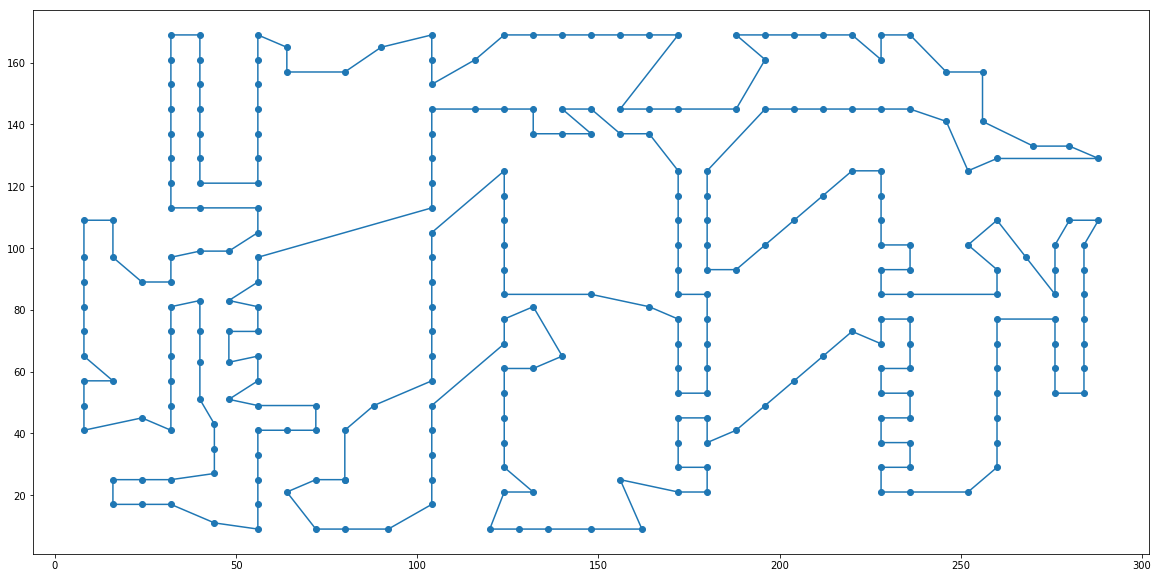

Route: [  0 277 276 275 274 273 272 271 270 269 268 267 266 265 264 263 262 261
 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243
 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227 226 225
 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209 208 207
 206 205 204 203 202 201 200 199 198 197 196 195 194 193 192 191 190 189
 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 158 157 156 155 117 118
 152 153 151 154 150 149 148 147 146 145 144 143 142 141 140 139 138 137
 136 135 134 133 132 131 130  18  19 129 128 127 126 125 124 123 122 121
 120 119 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101
 100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  73  74  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data_2[route[i]] for i in range(len(route))]),np.array([data_2[0]])))
# Plot the cities.
plt.scatter(data_2[:,0],data_2[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,data_2)))

# Optimal Solution , According to Heidelberg